## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [4]:
!pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.Collecting scikit-learn
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   -------------------------------- ------- 7.6/9.3 MB 39.3 MB/s eta 0:00:01
   ---------------------------------------- 9.3/9.3 MB 28.8 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ---------------------------------------- 0.0/42.2 MB ? eta -:--:--
   -------- ------------------------------- 9.4/42.2 MB 48.8 MB/s eta 0:00:01
   --------------- ------------------------ 16.5/42.2 MB 47.2 MB/s eta 0:00:01
   ------------------------ --------------- 26.2/42.2 MB 41.5 MB/s eta 0:00:01
   ----------------------------- ---------- 31.2/42.2 MB 36.7 MB/s eta 0:00:01
   ------------------------------- -------- 33.3/42.2 MB 32.0 MB/s eta 0:00:01
   ---------------------------------- --

In [7]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [8]:
df = pd.read_csv('StudentsPerformance.csv')

#### Show Top 5 Records

In [9]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [11]:
X = df.drop(columns=['math score'],axis=1)

In [11]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [14]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [18]:
y = df['math score']

In [19]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [23]:
# Create Column Transformer with 3 types of transformers
X = pd.DataFrame(X, columns=[f"col_{i}" for i in range(X.shape[1])])
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [24]:
X = preprocessor.fit_transform(X)

In [16]:
X.shape

(1000, 19)

In [25]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

#### Create an Evaluate Function to give all metrics after model Training

In [26]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [27]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3298
- Mean Absolute Error: 4.2765
- R2 Score: 0.8740
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3764
- Mean Absolute Error: 4.2080
- R2 Score: 0.8812


Lasso
Model performance for Training set
- Root Mean Squared Error: 5.9033
- Mean Absolute Error: 4.6909
- R2 Score: 0.8454
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.9129
- Mean Absolute Error: 4.6308
- R2 Score: 0.8563


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3232
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3909
- Mean Absolute Error: 4.2126
- R2 Score: 0.8806




c:\Users\shinc\OneDrive\Documents\Desktop\Projects\ml_project\venv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\shinc\OneDrive\Documents\Desktop\Projects\ml_project\venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\shinc\OneDrive\Documents\Desktop\Projects\ml_project\venv\lib\subprocess.py", line 493, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\shinc\OneDrive\Documents\Desktop\Projects\ml_project\venv\lib\subprocess.py", line 858, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\shinc\

K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 8.2425
- Mean Absolute Error: 6.5540
- R2 Score: 0.6987
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 11.3048
- Mean Absolute Error: 8.7020
- R2 Score: 0.4748


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.2795
- Mean Absolute Error: 0.0187
- R2 Score: 0.9997
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 8.1753
- Mean Absolute Error: 6.4350
- R2 Score: 0.7253


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 2.3056
- Mean Absolute Error: 1.8296
- R2 Score: 0.9764
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.0342
- Mean Absolute Error: 4.6497
- R2 Score: 0.8504


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 1.0073
- Mean Absolute Error: 0.6875
- R2 Score: 0.9955
-

### Results

In [28]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.881211
2,Ridge,0.880568
1,Lasso,0.856323
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.851435
5,Random Forest Regressor,0.850365
6,XGBRegressor,0.827797
4,Decision Tree,0.725341
3,K-Neighbors Regressor,0.474807


## Linear Regression

In [29]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.12


## Plot y_pred and y_test

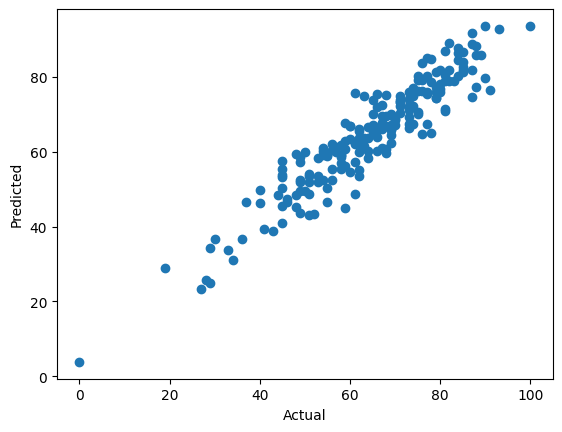

In [30]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

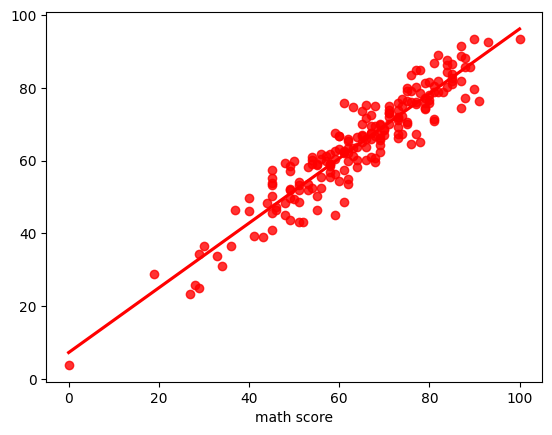

In [31]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [32]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.532643,14.467357
737,53,58.384205,-5.384205
740,80,76.669361,3.330639
660,74,77.099049,-3.099049
411,84,87.595143,-3.595143
...,...,...,...
408,52,43.239674,8.760326
332,62,62.208424,-0.208424
208,74,67.378346,6.621654
613,65,67.169361,-2.169361
